In [1]:
from latentmi import lmi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc 
from tqdm.notebook import tqdm
import os


/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
embeddings_dir = '../embeddings/Splatter/'
results = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(embeddings_dir):
    quality_path = os.path.join(embeddings_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue
    

    # find held-out cells
    held_out_path = os.path.join(quality_path, 'held_out_cells.h5ad')
    held_out = sc.read_h5ad(held_out_path)

    UMI_per_cell = held_out.X.sum()/len(held_out)

    cell_types = pd.get_dummies(held_out.obs['Group']).to_numpy()

    # loop through embedding files
    for file in tqdm(os.listdir(quality_path)):
        if not file.endswith('.npy'):
            continue

        # extract method and fraction from filename
        method, frac = file.split('_')
        frac = frac[4:-4]

        # load embeddings
        embedding_path = os.path.join(quality_path, file)
        embeddings = np.load(embedding_path)

        # estimate MI
        pmis, _, _ = lmi.estimate(embeddings[:10**4], cell_types[:10**4], 
                                    quiet=True, batch_size=2048, N_dims=16)
        mi = np.nanmean(pmis)

        # save result
        results.append({
            'Quality': quality_dir.split('_')[0],
            'UMI per cell' : UMI_per_cell,
            # 'Replicate': quality_dir.split('_')[1],
            # 'Fraction': float(frac),

            # watch out ! this needs to be tweaked if we change hold out size
            'Cell number' : int(float(frac)*3*len(held_out)),
            'Method': method,
            'Cell type MI': mi,
        })

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 293 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 273 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

  0%|          | 0/6 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

In [3]:
results = pd.DataFrame(results)
results

,Quality,UMI per cell,Cell number,Method,Cell type MI
0,Q2.000,7.5076,7500,VAE,0.012906
1,Q2.000,7.5076,7500,PCA,-0.006606
2,Q2.000,7.5076,7500,RandomProjection,0.028864
3,Q3.000,20.4640,7500,VAE,0.060966
4,Q3.000,20.4640,7500,PCA,0.034311
5,Q3.000,20.4640,7500,RandomProjection,0.036382
6,Q4.000,55.7276,7500,VAE,0.188498
7,Q4.000,55.7276,7500,PCA,0.083223
8,Q4.000,55.7276,7500,RandomProjection,0.083240
9,Q5.000,151.8532,7500,VAE,0.372393


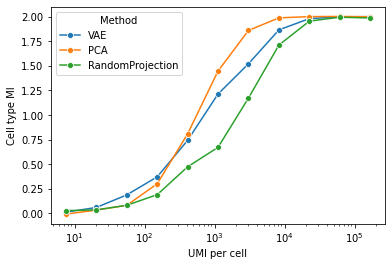

In [4]:
sns.lineplot(data=results, x='UMI per cell', y='Cell type MI', hue='Method', marker='o')
plt.xscale('log')

In [5]:
# results.to_csv('Splatter_results.csv', index=False)

In [6]:
# results = pd.read_csv('Splatter_results.csv')

In [7]:
from lmfit import Model
def info_scaling(x, A, B):
    return 0.5 * np.log2((1 + B*x)/(1 + A*x))
pretty_palette = sns.color_palette("Set1")

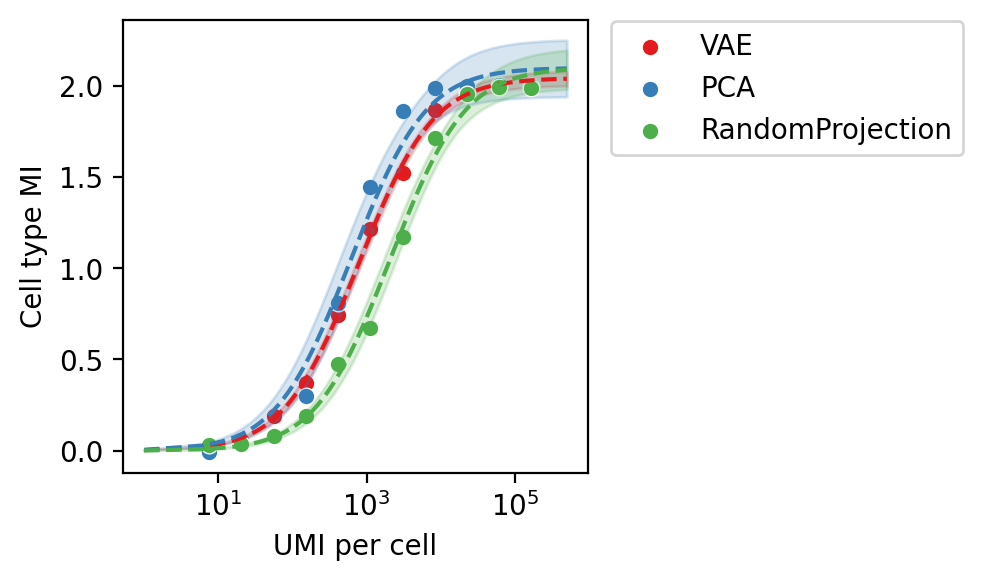

In [8]:
plt.figure(figsize=(3,3), dpi=200)

for i, method in enumerate(results['Method'].unique()):
    ax = sns.scatterplot(data=results[results['Method'] == method], x='UMI per cell', 
                         y='Cell type MI', label=method, color=pretty_palette[i])
    x_data = results[results['Method'] == method]['UMI per cell'] 
    ydata = results[results['Method'] == method]['Cell type MI']

    x_data = x_data.sort_values()
    ydata = ydata.sort_values()
    model = Model(info_scaling)
    params = model.make_params(A=1e-4, B=1e-4)  # initial guesses
    params['A'].min = 0  # set bounds
    params['B'].min = 0

    # fit model
    result = model.fit(ydata, params, x=x_data)

    x_fit = np.linspace(1, 5e5, 10**5)
    y_fit = model.eval(params=result.params, x=x_fit)

    y_upper = result.eval_uncertainty(params=result.params, 
                                    x=x_fit, sigma=2)
    y_lower = -y_upper

    ax.fill_between(x_fit, y_fit + y_upper, y_fit + y_lower, color=pretty_palette[i], alpha=0.2)

    ax.plot(x_fit, y_fit, color=pretty_palette[i], linestyle='--')


# ax.plot([1, 5e5], [2, 2], color='black', linestyle='--')
plt.xscale('log')
plt.legend(loc=(1.05, 0.7))